# Homework 3


## References

+ 《数值分析》

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.


## Student details

+ 姓名:郭俊烨
+ 学号:07Q20108
+ Email:gjy2383@gmail.com
------
+ 姓名:刘宏毅
+ 学号:07Q20138
+ Email:213201699@seu.edu.cn

## Problem 1： 利用Legendre 多项式近似函数，并画图

**要求:** 根据正交多项式近似函数，并分析收敛速度。

**提示：** 
1. 考虑$(-1,1)$上的函数$f(x)$的近似 $f_{N}(x)=\sum^{N-1}_{k=0} c_k L_k(x)$, 其中$L_k(x)$为Legendre多项式，$c_k$为待求系数。 利用Galerkin投影方法，上述问题转化为矩阵问题：
$$
\mathbf{Ac}=\mathbf{b},
$$
其中
$$
\mathbf{A}_{mn} = \int^1_{-1}L_m(x)L_n(x)dx, \, \mathbf{b}_m=\int^1_{-1}L_m(x)f(x)dx. 
$$

分别取$f(x) = x^4, \sin(2\pi x)$进行测试，讨论 $f_N(x)$收敛到$f$（关于N的）的速度。

2. 里面的积分可以用hw02中的数值积分进行求解（需要的点数较多）。建议用高斯求积公式（也可用调用网上已有程序）。

**Answer:**
<br><br><br><br><br><br><br><br>

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# calculate the legendre polyomial according to a recursive method
# n: the order of legendre polyomial
# x: the point you calcualte the legendre polynomial
def legendre(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2 * n - 1) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n
    
# calculate the coefficient in legendre approximation
# f: the function
# n: the highest order of the legendre polyomial
def legendre_appro_coff(f, n):

    lower_bound = -1
    upper_bound = 1

    A = np.zeros([n, n])
    b = np.zeros([n, 1])

    # calculate the elements in the matrix
    for i in range(n):
        # use scipy.integrate package to calculate numerical integrate
        b[i] = spi.quad(lambda x: f(x) * legendre(i, x), lower_bound, upper_bound)[0]
        for j in range(n):
            A[i, j] = spi.quad(lambda x: legendre(i, x) * legendre(j, x), lower_bound, upper_bound)[0]
    
    # solve the equation set
    c = np.linalg.solve(A, b)

    return c

# use the the coefficient in legendre approximation to calculate
# c: the coefficient in legendre approximation
# x: function points to calculate
def legendre_appro(c, x):

    y = np.zeros(len(x))
    for i in range(len(c)):
        y = y + c[i] * legendre(i, x)
    return y


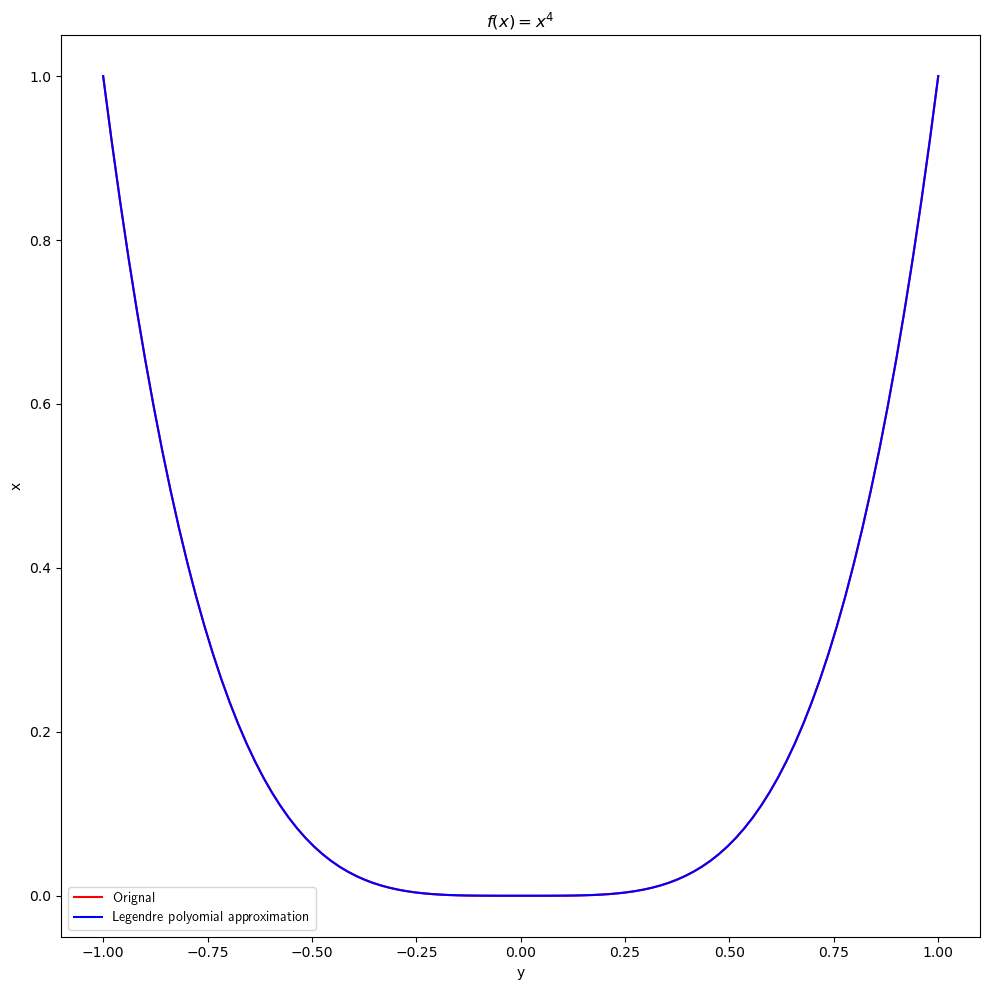

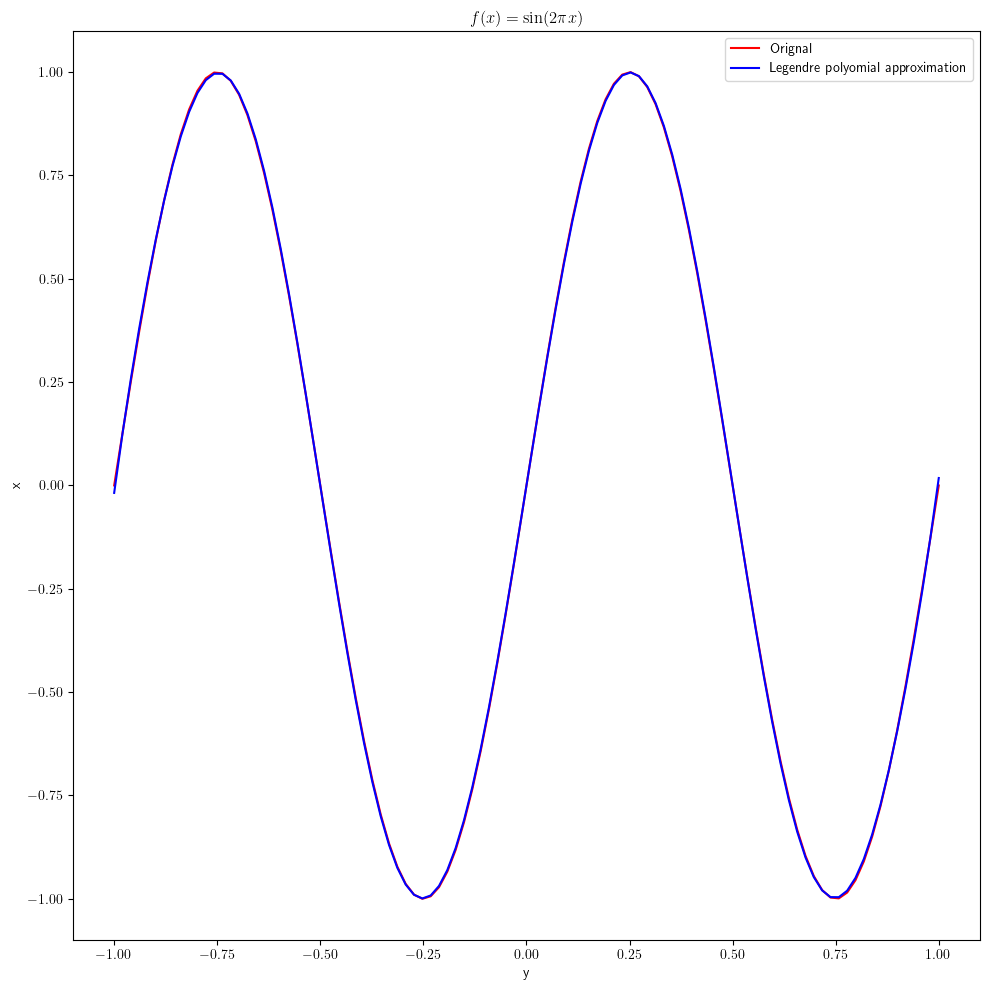

In [2]:
# f1, f2 to test
f1 = lambda x: x**4
f2 = lambda x: np.sin(2*np.pi*x)

# the maximun order of legendre approximation
n = 10

# range of points
x = np.linspace(-1, 1, 100)

# calculate f1's legendre approximation
c1 = legendre_appro_coff(f1, n)
y1 =f1(x)
appr_y1 = legendre_appro(c1, x)

# create a figure and modifiy its size
plt.figure(figsize=(10,10))

# output the figure
plt.plot(x, y1, label='Orignal', color='red')
plt.plot(x, appr_y1, label='Legendre polyomial approximation', color='blue')
plt.xlabel('y')
plt.ylabel('x')
plt.rcParams['text.usetex'] = True
plt.title(r'$ f(x) =  x^4$')
plt.legend()
plt.tight_layout()



# calculate f2's legendre approximation
c2 = legendre_appro_coff(f2, n)
y2 =f2(x)
appr_y2 = legendre_appro(c2, x)

# create a figure and modifiy its size
plt.figure(figsize=(10,10))

# output the figure
plt.plot(x, y2, label='Orignal', color='red')
plt.plot(x, appr_y2, label='Legendre polyomial approximation', color='blue')
plt.xlabel('y')
plt.ylabel('x')
plt.rcParams['text.usetex'] = True
plt.title(r'$ f(x) =  \sin(2\pi x)$')
plt.legend()
plt.tight_layout()



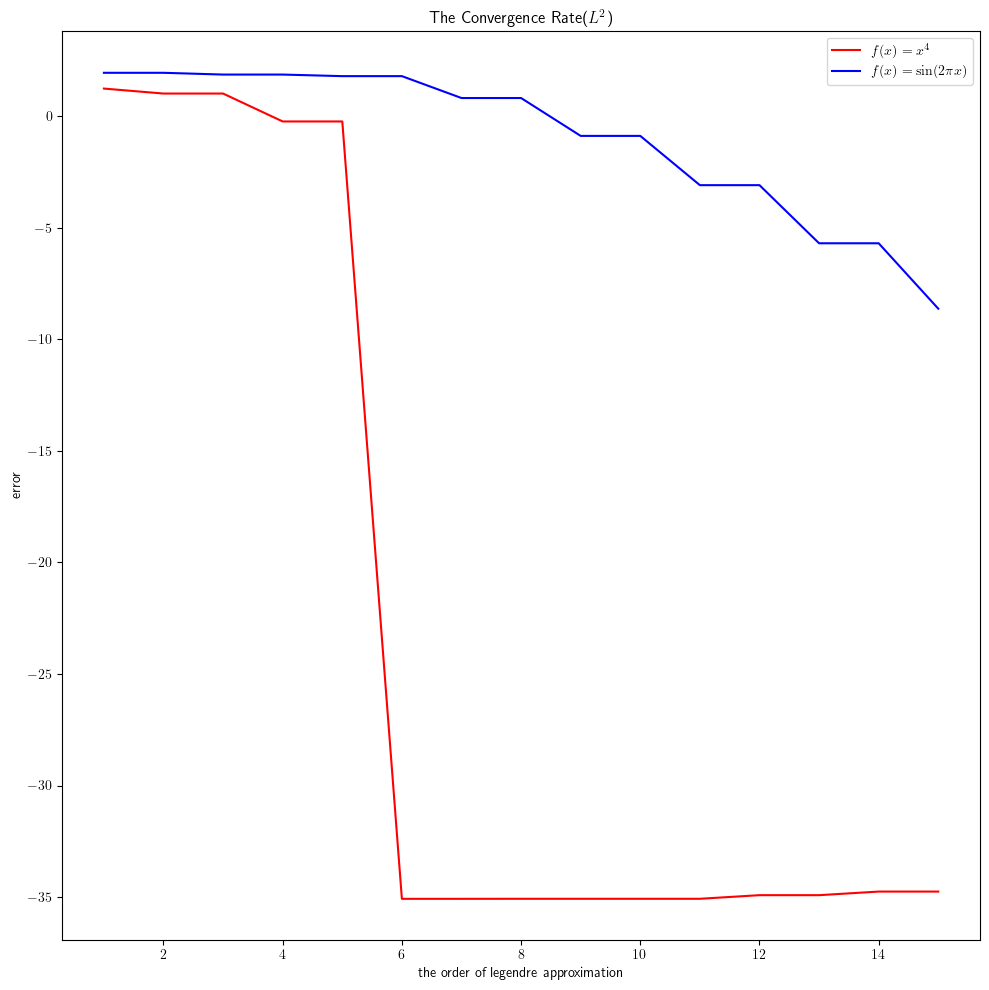

In [3]:
# compare the convergence rate

# range of points
x = np.linspace(-1, 1, 100)

# the maximun order of legendre to test
range_max = 15

# create arrays 
err1 = np.zeros(range_max)
err2 = np.zeros(range_max)
n = np.linspace(1, range_max, range_max)

for i in range(len(n)):

    # calcualte its legendre approximation 
    c1 = legendre_appro_coff(f1, i)
    y1 = f1(x)
    appr_y1 = legendre_appro(c1, x)

    c2 = legendre_appro_coff(f2, i)
    y2 = f2(x)
    appr_y2 = legendre_appro(c2, x)

    # calculate the error between the function and its legendre approximation; use L^2 norm
    err1[i] = np.linalg.norm(y1 - appr_y1)
    err2[i] = np.linalg.norm(y2 - appr_y2)

# create a figure and modifiy its size
plt.figure(figsize=(10,10))

# output the figure
plt.plot(n, np.log(err1), color='red', label=r'$ f(x) =  x^4$')
plt.plot(n, np.log(err2), color='blue', label=r'$ f(x) =  \sin(2\pi x)$')
plt.xlabel('the order of legendre approximation')
plt.ylabel('error')
plt.rcParams['text.usetex'] = True
plt.title(r'The Convergence Rate($L^2$)')
plt.legend()
plt.tight_layout()

## Problem 2:  利用正交多项式求方程的数值解

**要求：** 写出问题的Python实现，画图比较数值解和精确解并测试收敛阶。


考虑如下的方程：

$$
\begin{cases}
-u"+ \alpha u =f, \quad x \in(-1, 1)\\
u(-1) = u(1) =0, 
\end{cases}
$$
其中$\alpha \geq 0$为已知常数。

（具体实现时，可先取$u$的某个精确解（满足边界条件），然后取定$\alpha$的值（如1或其他），求出$f$。）

**提示**

1. $u$的近似解$u_N(x)$可以表示为：
$$
u_N(x)=\displaystyle  \sum^{N-1}_{k=0} c_k \phi_k(x), 
$$
其中 $\phi_k(x)$ 为基底函数，满足$\phi_k(\pm 1)=0$. 这里取$\phi_k(x) = L_k(x)-L_{k+2}(x)$, $L_k(x)$ 为Legendre多项式。通过Galerkin投影得到待求系数$c_k$满足的矩阵方程进行求解。



2. 具体实施时，通过先写出Jacobi多项式的Python实现，通过Legendre和Jacobi之间的关系，获得Legendre多项式以及导函数的表达式;其之间的关系如下：

  - 1） $L_k(x) = J^{0,0}_k(x)$, 其中$J^{\alpha,\beta}_k(x)$表示为参数为$\alpha,\beta$ 的k阶Jacobi多项式
  
  - 2） Jacobi多项式导数之间的关系满足
   $$\partial_{x} J^{\alpha,\beta}_n(x)=\frac{1}{2}(n+\alpha+\beta+1)J^{\alpha+1,\beta+1}_{n-1}(x)。$$

3. Jacobi 多项式$J^{\alpha,\beta}_{n}(x),\,x\in(-1,1)$的实现： 满足如下三项递推关系

   $$
   \begin{cases} 
   J^{\alpha,\beta}_{n+1}(x)=(a^{\alpha,\beta}_n x - b^{\alpha,\beta}_n)J^{\alpha,\beta}_n(x)-c^{\alpha,\beta}_n J^{\alpha,\beta}_{n-1}(x), \quad n\geq 1;\\
   J^{\alpha,\beta}_0(x) =1, J^{\alpha,\beta}_1(x)=\frac{1}{2}(\alpha+\beta+2)x+\frac{1}{2}(\alpha-\beta),
   \end{cases}
   $$
其中：
$$a^{\alpha,\beta}_n = \frac{(2n+\alpha+\beta+1)(2n+\alpha+\beta+2)}{2(n+1)(n+\alpha+\beta+1)},$$

$$b^{\alpha,\beta}_n = \frac{(2n+\alpha+\beta+1)(\beta^2-\alpha^2)}{2(n+1)(n+\alpha+\beta+1)(2n+\alpha+\beta)},$$

$$c^{\alpha,\beta}_n = \frac{(2n+\alpha+\beta+2)(n+\alpha)(n+\beta)}{(n+1)(n+\alpha+\beta+1)(2n+\alpha+\beta)},$$

4. 求积分时，可用自己写的求积公式，也可用高斯求积公式。更建议用高斯求积公式。



**Answer:**
<br><br><br><br><br><br><br><br>

求导法 得到解 -1.0 - (3.57610174e-16)·x - (4.00568467e-13)·x² + (2.95982931e-15)·x³ +
(2.73947531e-12)·x⁴ - (9.2976264e-15)·x⁵ - (6.83719747e-12)·x⁶ +
(1.33696706e-14)·x⁷ + (7.07034431e-12)·x⁸ - (8.80085721e-15)·x⁹ +
1.0·x¹⁰ + (2.1265939e-15)·x¹¹ 
收敛阶为: 14.375113127074508


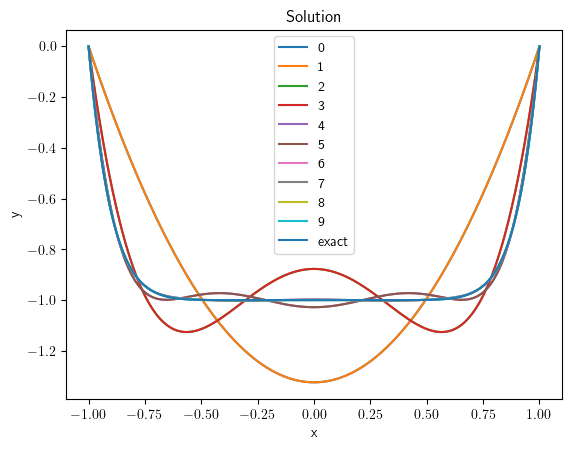

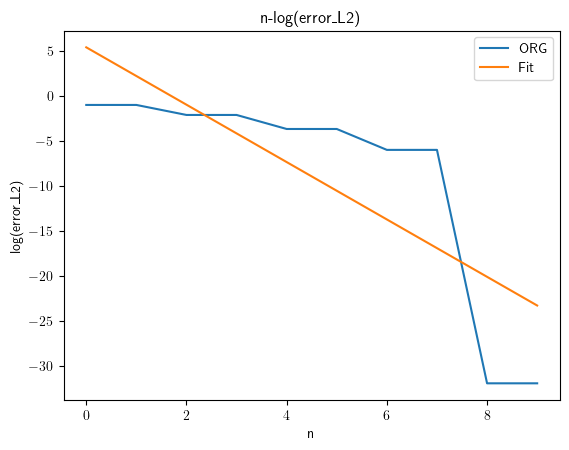

Jacobi法 得到解 -1.0 - (3.2796745e-16)·x + (1.54126711e-13)·x² + (2.47588944e-15)·x³ -
(1.31161748e-12)·x⁴ - (6.96830086e-15)·x⁵ + (3.76765286e-12)·x⁶ +
(8.67057816e-15)·x⁷ - (4.40492087e-12)·x⁸ - (4.57619539e-15)·x⁹ +
1.0·x¹⁰ + (7.25996103e-16)·x¹¹ 
收敛阶为: 14.435224969146118


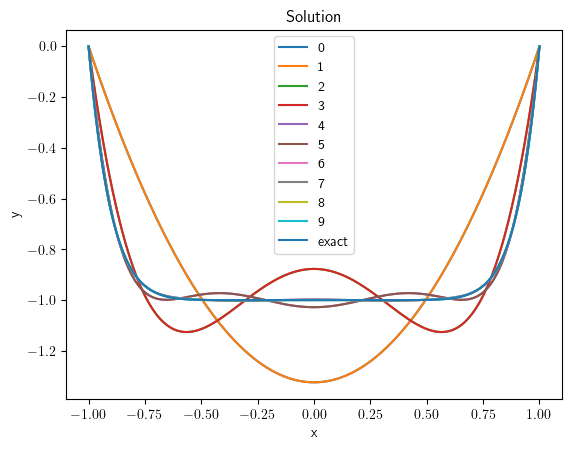

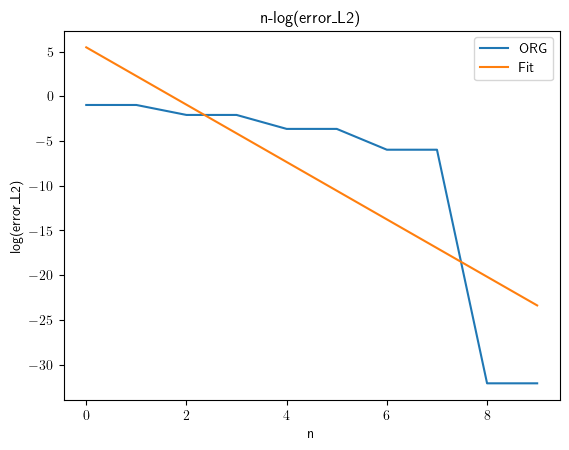

求导法 得到解 -7.64849574e-17 + 3.14159094·x + (1.74565198e-16)·x² - 5.16766769·x³ +
(4.62104167e-17)·x⁴ + 2.54982221·x⁵ - (9.95004681e-16)·x⁶ -
0.59814301·x⁷ + (1.72775351e-15)·x⁸ + 0.0803356·x⁹ -
(8.77039481e-16)·x¹⁰ - 0.00593805·x¹¹ 
收敛阶为: 7.404053000460236


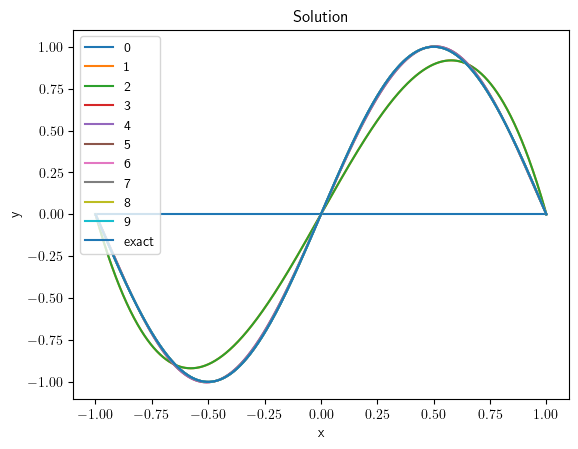

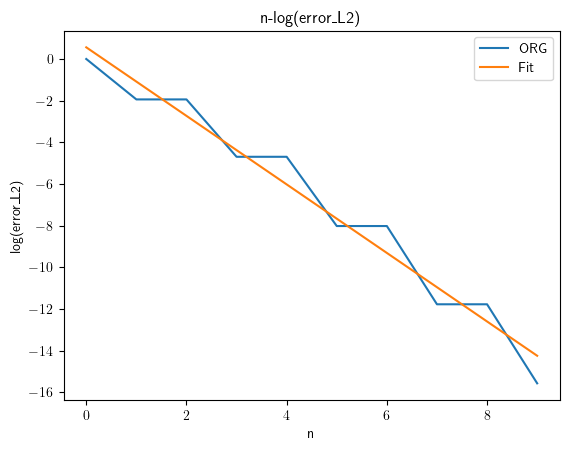

Jacobi法 得到解 -8.1255447e-17 + 3.14159094·x + (2.46122541e-16)·x² - 5.16766769·x³ -
(1.20756718e-16)·x⁴ + 2.54982221·x⁵ - (8.948244e-16)·x⁶ - 0.59814301·x⁷ +
(1.72775351e-15)·x⁸ + 0.0803356·x⁹ - (8.77039481e-16)·x¹⁰ - 0.00593805·x¹¹ 
收敛阶为: 7.404053001419545


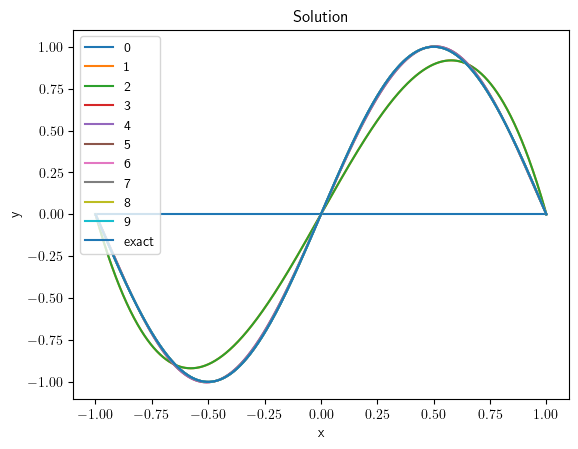

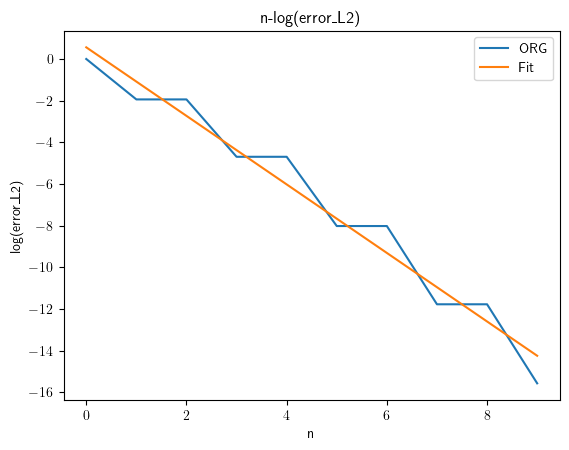

求导法 得到解 -0.84147146 - (3.68863135e-17)·x + 0.54033476·x² + (2.49068347e-16)·x³ +
0.42037185·x⁴ - (8.16961758e-16)·x⁵ - 0.08852757·x⁶ +
(1.03881861e-15)·x⁷ - 0.03803193·x⁸ - (4.51915166e-16)·x⁹ +
0.00732436·x¹⁰ + (1.78762787e-17)·x¹¹ 
收敛阶为: 6.44221604294545


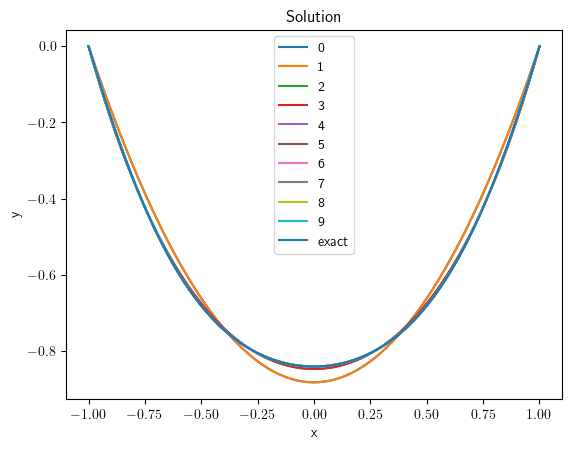

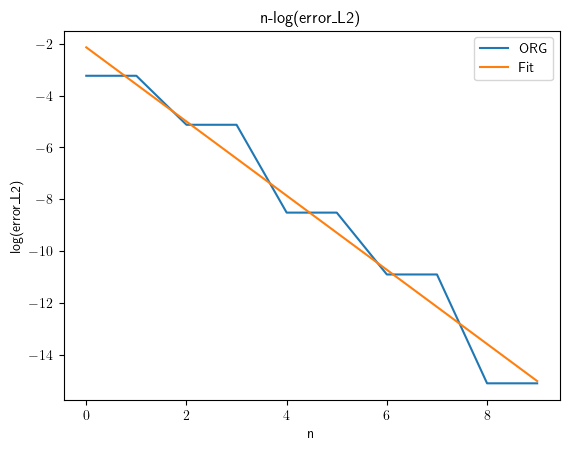

Jacobi法 得到解 -0.84147146 - (3.88389362e-17)·x + 0.54033476·x² + (4.13309417e-16)·x³ +
0.42037185·x⁴ - (2.00233822e-15)·x⁵ - 0.08852757·x⁶ +
(3.96132905e-15)·x⁷ - 0.03803193·x⁸ - (3.41750697e-15)·x⁹ +
0.00732436·x¹⁰ + (1.08404566e-15)·x¹¹ 
收敛阶为: 6.442216042510563


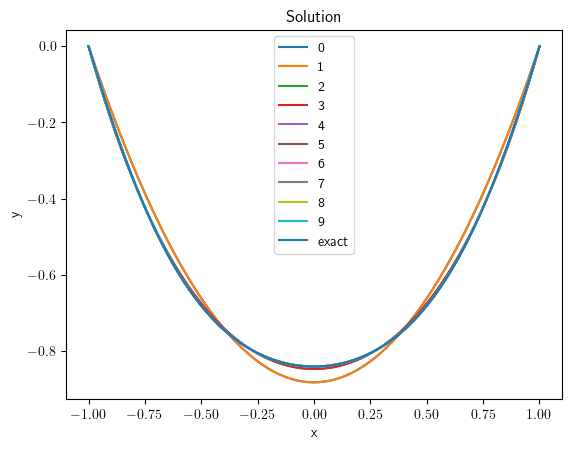

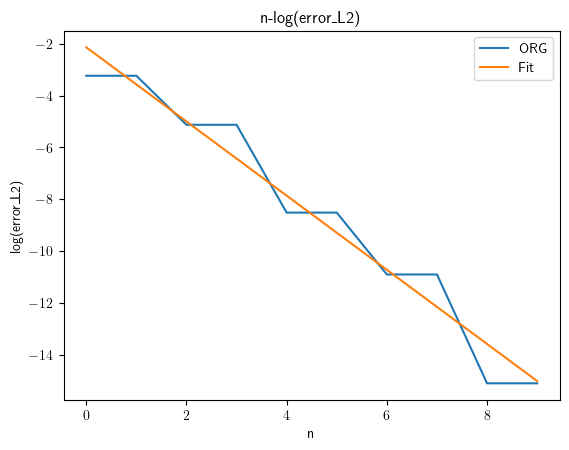

求导法 得到解 -0.68354944 - (1.5235857e-18)·x + 0.63290114·x² - (1.30667607e-16)·x³ +
0.04430006·x⁴ + (9.03003032e-16)·x⁵ + 0.00590795·x⁶ -
(2.26342859e-15)·x⁷ + 0.00041967·x⁸ + (2.38186338e-15)·x⁹ +
(2.06154412e-05)·x¹⁰ - (8.89246631e-16)·x¹¹ 
收敛阶为: -0.001896217190214682


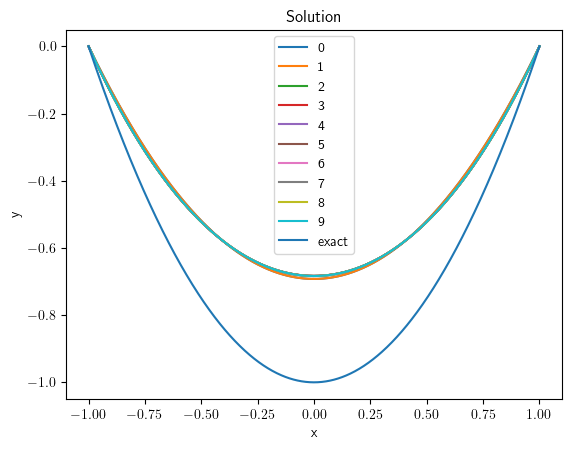

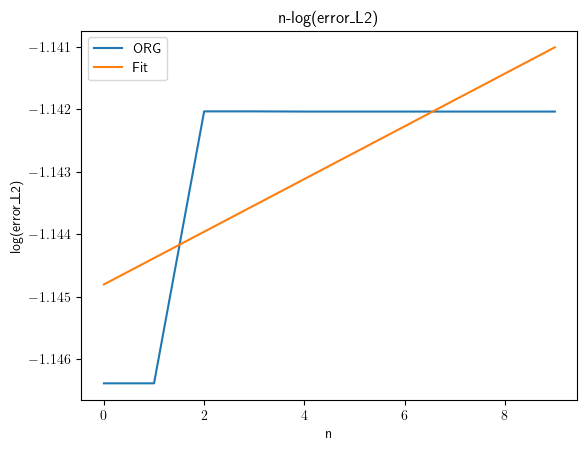

Jacobi法 得到解 -0.68354944 - (1.80373087e-17)·x + 0.63290114·x² + (2.36506938e-16)·x³ +
0.04430006·x⁴ - (1.22205775e-15)·x⁵ + 0.00590795·x⁶ +
(2.61273278e-15)·x⁷ + 0.00041967·x⁸ - (2.44784064e-15)·x⁹ +
(2.06154413e-05)·x¹⁰ + (8.38695977e-16)·x¹¹ 
收敛阶为: -0.0018962171902144448


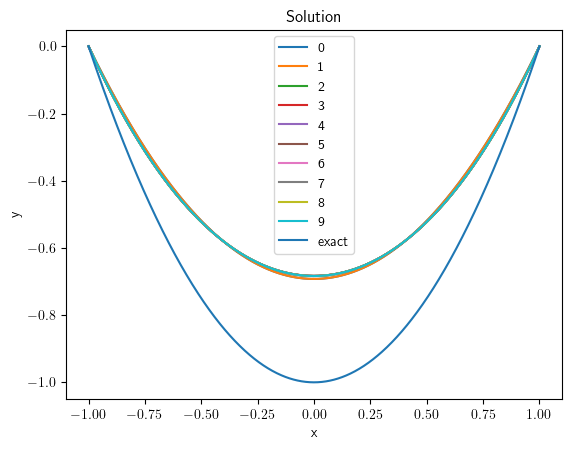

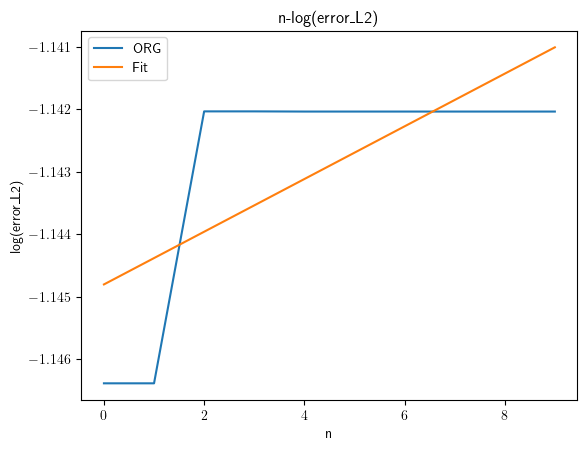

In [5]:
from numpy import *
from matplotlib.pyplot import *
from numpy import polynomial as P
from numpy import linalg as L#线性方程组求解
from scipy.special import roots_legendre#用于获得高斯型积分所需参数

################################################################求解部分

def createb(Basis,f,x,w):#x，w为求积节点和权重
    n=size(Basis)
    b=zeros(n)#相乘所得向量
    for i in range(0,n):
        b[i]=dot(Basis[i](x)*f,w)#数值积分
    return b

def createA(f,x,w):
    n=size(f)
    A=zeros([n,n])#相乘所得对称矩阵
    for i in range(0,n):
        for j in range(0,n):
            if j>=i:
                A[i,j]=dot(f[i](x)*f[j](x),w)
            else:
                A[i,j]=A[j,i]#对称，节省计算量
    return A

def SolveODE(Basis,dBasis,x,w,f,Alpha):#N：所取基的个数 x，w为求积节点和权重 f alpha决定ODE
    A=(Alpha*createA(Basis,x,w)+createA(dBasis,x,w))
    b=createb(Basis,f,x,w)
    return dot(L.solve(A,b),Basis)#内积结果为解函数

################################################################Jacobi求基函数
def NextJacobi(a,b,n,JacobiSequence):
    JacobiA=(2*n+a+b+1)*(2*n+a+b+2)/(2*(n+1)*(n+a+b+1))
    JacobiB=(2*n+a+b+1)*(b**2-a**2)/(2*(n+1)*(n+a+b+1)*(2*n+a+b))
    JacobiC=(2*n+a+b+2)*(n+a)*(n+b)/((n+1)*(n+a+b+1)*(2*n+a+b))
    return (JacobiA*P.Polynomial([0,1],domain=[-1,1])-JacobiB)*JacobiSequence[n]-JacobiC*JacobiSequence[n-1]

def JacobiSeq(N):
    Jacobi00=[P.Polynomial(1,domain=[-1,1])]#多项式1，而非浮点数1#参数为00
    dJacobi00=[P.Polynomial(0,domain=[-1,1])]
    if N==1:
        return Jacobi00,dJacobi00#特殊处理
    Jacobi00.append(P.Polynomial([0,1],domain=[-1,1]))
    dJacobi00.append(P.Polynomial(1,domain=[-1,1]))
    if N==2:
        return Jacobi00,dJacobi00#特殊处理
    Jacobi00.append(NextJacobi(0,0,1,Jacobi00))
    dJacobi00.append(P.Polynomial([0,3],domain=[-1,1]))
    if N==3:
        return Jacobi00,dJacobi00#特殊处理
    Jacobi11=[P.Polynomial(1,domain=[-1,1]),P.Polynomial([0,2],domain=[-1,1])]#参数为11
    for n in range(3,N):
        Jacobi00.append(NextJacobi(0,0,n-1,Jacobi00))
        Jacobi11.append(NextJacobi(1,1,n-2,Jacobi11))
        dJacobi00.append(((n+1)*Jacobi11[n-1])/2)
    return array(Jacobi00),array(dJacobi00)#得到多项式，向量形式便于后续处理

def BasisANDdBasisSeq(N):
    LegendreSeq,dLegendreSeq=JacobiSeq(N+2)
    return LegendreSeq[0:N]-LegendreSeq[2:N+2],dLegendreSeq[0:N]-dLegendreSeq[2:N+2]#基与基的导数

################################################################直接求导

def DiffPoly(f):
    CoefofF=f.coef
    n=size(CoefofF)
    return P.Polynomial((CoefofF*array(range(0,n)))[1:n],domain=[-1,1])#对多项式f求导 #可用Fx.deriv()

def CreateLegendreSequence(N):#N为多项式个数
    LegendreSequence=[P.Polynomial(1,domain=[-1,1])]#多项式1，而非浮点数1
    if N==1:
        return LegendreSequence#特殊处理
    Polynomialx=P.Polynomial([0,1],domain=[-1,1])
    LegendreSequence.append(Polynomialx)
    n=1#n为当前最后一个多项式的下标
    while n<N-1:#注意边界
        LegendreSequence.append(((2*n+1)*Polynomialx*LegendreSequence[n]-n*LegendreSequence[n-1])/(n+1))#往后添加第（n+1）个
        n+=1
    return array(LegendreSequence)#得到多项式，向量形式便于后续处理

def CreateBasisANDdbasis(N):
    LegendreSeq=CreateLegendreSequence(N+2)
    Basis=LegendreSeq[0:N]-LegendreSeq[2:N+2]
    dBasis=list()
    for phi in Basis:
        dBasis.append(DiffPoly(phi))
    return Basis,dBasis#基与基的导数

################################################################分析部分

xVals=linspace(-1,1,1000)#绘图用分点，全局变量

def TestAndDraw(Basis,dBasis,tempEXAGauss,NtempNonLinearF,Alpha,N,GaussX,GaussW,X,tempEXA,nVals,flag):
    Solution=list()
    L2Solution=list()

    for n in range(1,N+1):
        Solution.append(SolveODE(Basis[0:n],dBasis[0:n],GaussX,GaussW,NtempNonLinearF,Alpha))
        L2Solution.append(dot((Solution[n-1](GaussX)-tempEXAGauss)**2,GaussW)**(1/2))#L2意义下的差

    LogL2=log(L2Solution)#取对数，后续进行一次多项式拟合
    Fitcurve=P.Polynomial.fit(nVals,LogL2,deg=1)
    Logcurve=Fitcurve(nVals)#生成拟合数据

    print(flag,"得到解",Solution[N-1],"\n收敛阶为:",-Fitcurve.coef[1])

    figure()
    xlabel("x")
    ylabel("y")
    title("Solution")
    for m in range(0,N):
        plot(X,Solution[m](X),label=m)
    plot(X,tempEXA,label="exact")
    legend()
    show()

    figure()
    title("n-log(error_L2)")
    xlabel("n")
    ylabel("log(error_L2)")
    plot(nVals,LogL2,label="ORG")
    plot(nVals,Logcurve,label="Fit")
    legend()
    show()

def TestControl(Fexact,NonLinearF,Alpha,N=10,GaussOrder=0,X=xVals):#精确解，f,alpha，近似解所用项数的最大值，Gauss求积公式所用点数，绘图时X所取坐标
    if GaussOrder==0:
        GaussOrder=N+2#解的次数最高N+1次，要求对2*(N+1)次精确（点数为n,2*(n-1)+1>=2*(N+1)）
    GaussX,GaussW=roots_legendre(N+2)
    GaussX,GaussW=array(GaussX),array(GaussW)
    tempEXA=Fexact(X)
    tempNonLinearF=NonLinearF(GaussX)
    tempEXAGauss=Fexact(GaussX)
    nVals=array(list(range(0,N)))

    BasisA,dBasisA=BasisANDdBasisSeq(N)
    BasisB,dBasisB=CreateBasisANDdbasis(N)#只生成一次基，避免重复运算

    TestAndDraw(BasisA,dBasisA,tempEXAGauss,tempNonLinearF,Alpha,N,GaussX,GaussW,X,tempEXA,nVals,"求导法")
    TestAndDraw(BasisB,dBasisB,tempEXAGauss,tempNonLinearF,Alpha,N,GaussX,GaussW,X,tempEXA,nVals,"Jacobi法")


################################################################测试部分

def NonLinearF(x):
    return x**10-1-90*(x**8)#定义非线性项f
def F(x):
    return x**10-1
TestControl(F,NonLinearF,1)
#精确度多项式包含10次项后精度突然升高

####################

def fun(x):
    return pi**2*sin(pi*x)
def realu(x):
    return sin(pi*x)
TestControl(realu,fun,0)

####################

def fun(x):
    return (4+4*x**2)*sin(x**2-1)-2*cos(x**2-1)
def realu(x):
    return sin(x**2-1)
TestControl(realu,fun,4)

####################

def fun(x):
    return 2*(x**2)-4
def realu(x):
    return x**2-1
TestControl(realu,fun,4)

-End-